In [60]:
!pip install --upgrade tensorflow

  Using cached tensorflow-2.2.0-cp38-cp38-win_amd64.whl (459.2 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.2.0-py2.py3-none-any.whl (454 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0


In [7]:
!pip install libwebp

ERROR: Could not find a version that satisfies the requirement libwebp (from versions: none)
ERROR: No matching distribution found for libwebp


In [50]:
# 비행기, 사과, 고양이 3가지의 이미지를 분류해본다
# 이미지 수가 부족해 비슷한 데이터들을 각도를 다르게 해서 여러가지 데이터로 만든 후 진행했다.

In [53]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "./multi_img_data/imgs_others/train"
categories = ["airplane", "apple", "cat"]
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("./multi_img_data/imgs_others/multi_image_data.npy", xy)

print("ok", len(y))

airplane  파일 길이 :  150
airplane  :  ./multi_img_data/imgs_others/train/airplane\00000000.jpg
apple  파일 길이 :  150
apple  :  ./multi_img_data/imgs_others/train/apple\a1r_327_100 (1).jpg
cat  파일 길이 :  150
cat  :  ./multi_img_data/imgs_others/train/cat\cat.4001.jpg
ok 450


In [54]:
for idx, cat in enumerate(categories):
    #print(idx)
    #print(cat)
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        print(f)

airplane  파일 길이 :  150
./multi_img_data/imgs_others/train/airplane\00000000.jpg
./multi_img_data/imgs_others/train/airplane\00000001.jpg
./multi_img_data/imgs_others/train/airplane\00000002.jpg
./multi_img_data/imgs_others/train/airplane\00000003.jpg
./multi_img_data/imgs_others/train/airplane\00000004.jpg
./multi_img_data/imgs_others/train/airplane\00000005.jpg
./multi_img_data/imgs_others/train/airplane\00000006.jpg
./multi_img_data/imgs_others/train/airplane\00001036.jpg
./multi_img_data/imgs_others/train/airplane\00001037.jpg
./multi_img_data/imgs_others/train/airplane\00001038.jpg
./multi_img_data/imgs_others/train/airplane\00001039.jpg
./multi_img_data/imgs_others/train/airplane\00001040.jpg
./multi_img_data/imgs_others/train/airplane\00001042.jpg
./multi_img_data/imgs_others/train/airplane\00001043.jpg
./multi_img_data/imgs_others/train/airplane\00001044.jpg
./multi_img_data/imgs_others/train/airplane\00001045.jpg
./multi_img_data/imgs_others/train/airplane\00001047.jpg
./multi_

In [55]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
#import keras.backend.tensorflow_backend as K

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('./multi_img_data/imgs_others/multi_image_data.npy', allow_pickle = True)
print(X_train.shape)
print(X_train.shape[0])

(337, 64, 64, 3)
337


In [56]:
categories = ["airplane", "apple", "cat"]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [57]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './multi_img_data/imgs_others/model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 16384)            

In [90]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 0.1756 - accuracy: 0.9377
Epoch 00001: val_loss did not improve from 0.12972
11/11 [==============================] - 2s 192ms/step - loss: 0.1756 - accuracy: 0.9377 - val_loss: 0.2687 - val_accuracy: 0.8850
Epoch 2/100
11/11 [==============================] - ETA: 0s - loss: 0.0861 - accuracy: 0.9585
Epoch 00002: val_loss did not improve from 0.12972
11/11 [==============================] - 2s 166ms/step - loss: 0.0861 - accuracy: 0.9585 - val_loss: 0.2008 - val_accuracy: 0.9115
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 0.0469 - accuracy: 0.9852
Epoch 00003: val_loss did not improve from 0.12972
11/11 [==============================] - 2s 162ms/step - loss: 0.0469 - accuracy: 0.9852 - val_loss: 0.1887 - val_accuracy: 0.9115
Epoch 4/100
11/11 [==============================] - ETA: 0s - loss: 0.0328 - accuracy: 0.9941
Epoch 00004: val_loss did not improve from 0.12972
11/11 [================

Epoch 59/100
11/11 [==============================] - ETA: 0s - loss: 6.4848e-04 - accuracy: 1.0000
Epoch 00059: val_loss did not improve from 0.12972
11/11 [==============================] - 2s 164ms/step - loss: 6.4848e-04 - accuracy: 1.0000 - val_loss: 0.7324 - val_accuracy: 0.9027
Epoch 60/100
11/11 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 00060: val_loss did not improve from 0.12972
11/11 [==============================] - 2s 161ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.7926 - val_accuracy: 0.9027
Epoch 61/100
11/11 [==============================] - ETA: 0s - loss: 3.3763e-04 - accuracy: 1.0000
Epoch 00061: val_loss did not improve from 0.12972
11/11 [==============================] - 2s 165ms/step - loss: 3.3763e-04 - accuracy: 1.0000 - val_loss: 0.7871 - val_accuracy: 0.9027
Epoch 62/100
11/11 [==============================] - ETA: 0s - loss: 4.1307e-04 - accuracy: 1.0000
Epoch 00062: val_loss did not improve from 0.12972

Epoch 88/100
11/11 [==============================] - ETA: 0s - loss: 1.0631e-04 - accuracy: 1.0000
Epoch 00088: val_loss did not improve from 0.12972
11/11 [==============================] - 2s 165ms/step - loss: 1.0631e-04 - accuracy: 1.0000 - val_loss: 0.7002 - val_accuracy: 0.9204
Epoch 89/100
11/11 [==============================] - ETA: 0s - loss: 4.8355e-05 - accuracy: 1.0000
Epoch 00089: val_loss did not improve from 0.12972
11/11 [==============================] - 2s 164ms/step - loss: 4.8355e-05 - accuracy: 1.0000 - val_loss: 0.7036 - val_accuracy: 0.9204
Epoch 90/100
11/11 [==============================] - ETA: 0s - loss: 1.4573e-04 - accuracy: 1.0000
Epoch 00090: val_loss did not improve from 0.12972
11/11 [==============================] - 2s 164ms/step - loss: 1.4573e-04 - accuracy: 1.0000 - val_loss: 0.7093 - val_accuracy: 0.9204
Epoch 91/100
11/11 [==============================] - ETA: 0s - loss: 5.5238e-05 - accuracy: 1.0000
Epoch 00091: val_loss did not improve from

In [91]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

4/4 [==============================] - 0s 30ms/step - loss: 0.7492 - accuracy: 0.9204
정확도 : 0.9204


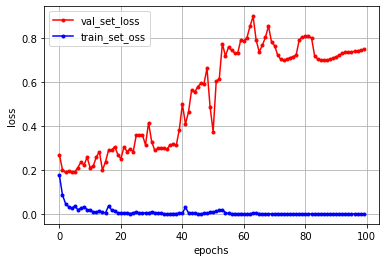

In [92]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [93]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "./multi_img_data/imgs_others/test"
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
model = load_model('./multi_img_data/imgs_others/model/multi_img_classification.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "비행기"
    elif pre_ans == 1: pre_ans_str = "사과"
    else: pre_ans_str = "고양이"
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("/")[-1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("/")[-1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("/")[-1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    cnt += 1

[0.000 0.000 1.000]
2
해당 test\고양이 (2).jpg이미지는 고양이로 추정됩니다.
[0.000 0.000 1.000]
2
해당 test\고양이 (3).jpg이미지는 고양이로 추정됩니다.
[1.000 0.000 0.000]
0
해당 test\고양이 (4).jpg이미지는 비행기로 추정됩니다.
[0.000 0.000 1.000]
2
해당 test\고양이.jpg이미지는 고양이로 추정됩니다.
[1.000 0.000 0.000]
0
해당 test\고양이.png이미지는 비행기로 추정됩니다.
[1.000 0.000 0.000]
0
해당 test\비행기 (2).jpg이미지는 비행기로 추정됩니다.
[1.000 0.000 0.000]
0
해당 test\비행기 (3).jpg이미지는 비행기로 추정됩니다.
[1.000 0.000 0.000]
0
해당 test\비행기 (4).jpg이미지는 비행기로 추정됩니다.
[1.000 0.000 0.000]
0
해당 test\비행기 (5).jpg이미지는 비행기로 추정됩니다.
[1.000 0.000 0.000]
0
해당 test\비행기.jpg이미지는 비행기로 추정됩니다.
[0.000 0.000 1.000]
2
해당 test\사과 (2).jpg이미지는 고양이로 추정됩니다.
[0.000 0.000 1.000]
2
해당 test\사과 (3).jpg이미지는 고양이로 추정됩니다.
[0.000 0.000 1.000]
2
해당 test\사과 (4).jpg이미지는 고양이로 추정됩니다.
[0.000 0.000 1.000]
2
해당 test\사과 (5).jpg이미지는 고양이로 추정됩니다.
[0.000 1.000 0.000]
1
해당 test\사과.jpg이미지는 사과으로 추정됩니다.
